# Regresión Lineal
## Concepto y ejemplos

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Ejemplo: Los siguientes datos representan el tamaño de la casa en pies cudrados y el precio en miles de dolares.
+    'Tamaño (pies cuadrados)': [1500, 1600, 1700, 1800, 1900],
+    'Precio (miles de dólares)': [300, 320, 340, 360, 380]

In [2]:

# Ejemplo de datos: precio de la casa vs. tamaño
data = {
    'Tamaño (pies cuadrados)': [1500, 1600, 1700, 1800, 1900],
    'Precio (miles de dólares)': [300, 320, 340, 360, 380]
}
df = pd.DataFrame(data)

# Definir la variable dependiente (Y) y la independiente (X)
X = df['Tamaño (pies cuadrados)']
Y = df['Precio (miles de dólares)']

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(Y, X).fit()

# Resumen del modelo
print(modelo.summary())


                                OLS Regression Results                               
Dep. Variable:     Precio (miles de dólares)   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 1.955e+29
Date:                       Wed, 04 Sep 2024   Prob (F-statistic):           2.55e-44
Time:                               10:05:02   Log-Likelihood:                 142.06
No. Observations:                          5   AIC:                            -280.1
Df Residuals:                              3   BIC:                            -280.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


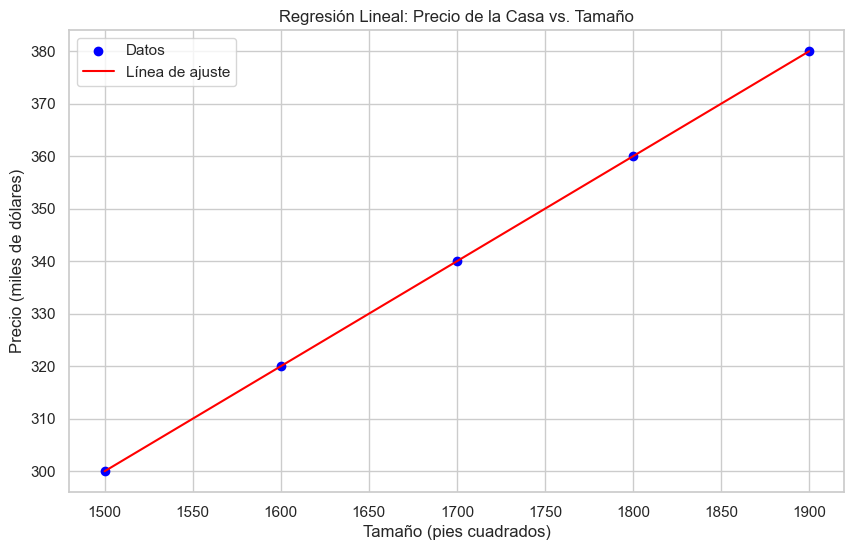

In [3]:

# Graficar los datos y la línea de regresión
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Graficar puntos de datos
plt.scatter(df['Tamaño (pies cuadrados)'], df['Precio (miles de dólares)'], color='blue', label='Datos')

# Graficar la línea de regresión
plt.plot(df['Tamaño (pies cuadrados)'], modelo.predict(X), color='red', label='Línea de ajuste')

# Anotaciones adicionales
plt.title('Regresión Lineal: Precio de la Casa vs. Tamaño')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.legend()

# Mostrar la gráfica con las anotaciones adicionales
plt.show()
